In [15]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [17]:
# Path ke dataset
file_path = '/content/drive/MyDrive/Dataset/CreditDataset.csv'

# Membaca dataset
df = pd.read_csv(file_path)
print("Dataset berhasil dibaca!")
print("Ukuran dataset:", df.shape)
print(df.info())

Dataset berhasil dibaca!
Ukuran dataset: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(

In [18]:
# 2. Data Preprocessing
# Identifikasi kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns)

# Encoding kolom kategorikal (gunakan one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print("Dataset setelah encoding:", df_encoded.info())

# Asumsi kolom terakhir adalah target (ubah sesuai dataset Anda)
X = df_encoded.iloc[:, :-1]  # Fitur (semua kolom kecuali target)
y = df_encoded.iloc[:, -1]   # Target (kolom terakhir)

# Normalisasi target ke dalam rentang [0, 1]
y = y.astype(float)  # Konversi target ke tipe float
y_normalized = (y - y.min()) / (y.max() - y.min())

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kolom kategorikal: Index(['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17',
       'x19', 'x20'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   x2        1000 non-null   int64
 1   x5        1000 non-null   int64
 2   x8        1000 non-null   int64
 3   x11       1000 non-null   int64
 4   x13       1000 non-null   int64
 5   x16       1000 non-null   int64
 6   x18       1000 non-null   int64
 7   Class     1000 non-null   int64
 8   x1_A11    1000 non-null   bool 
 9   x1_A12    1000 non-null   bool 
 10  x1_A13    1000 non-null   bool 
 11  x1_A14    1000 non-null   bool 
 12  x3_A30    1000 non-null   bool 
 13  x3_A31    1000 non-null   bool 
 14  x3_A32    1000 non-null   bool 
 15  x3_A33    1000 non-null   bool 
 16  x3_A34    1000 non-null   bool 
 17  x4_A40    1000 non-null   bool 
 18  x4_A41  

Hasil Evaluasi SVM Regression:
Mean Squared Error (MSE): 0.011570782853697857
Mean Absolute Error (MAE): 0.09136430220043586
R-squared (R²): 0.7307554891518824


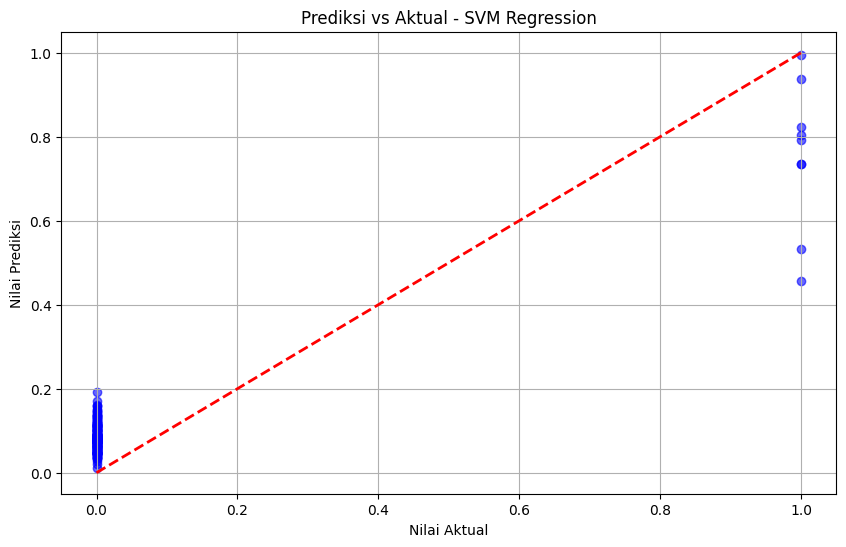

In [19]:
# 3. Model Training: SVM Regression
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)

# Prediksi
y_pred = svm_regressor.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print hasil evaluasi
print("Hasil Evaluasi SVM Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)  # Line of perfect prediction
plt.title('Prediksi vs Aktual - SVM Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid()
plt.show()